<a href="https://colab.research.google.com/github/Rmejiaz/ModeladoSimulacion/blob/main/Cuadernos/VerletMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Verlet para resolver ecuaciones diferenciales ordinarias

## Modelado y Simulación

#### Rafael Mejía Zuluaga
#### Sergio Alejandro Rojas Yantén

## Formulación Matemática:

\begin{equation}
\frac{dv}{dt}=a(x(t),v(t),t)
\tag{1}
\end{equation}

\begin{equation}
\frac{dx}{dt}=v(t)
\tag{2}
\end{equation}

\begin{equation}
x(t)=\sum_{n=0}^{\infty}\frac{x^{n}(t_{0})}{n!}(t-t_{0})^{n}
\tag{}
\end{equation}

\begin{equation}
x(t_{0}+\Delta t)=\sum_{n=0}^{\infty}\frac{x^{n}(t_{0})}{n!}(\Delta t)^{n}
\tag{}
\end{equation}

\begin{equation}
x(t_{0}-\Delta t)=\sum_{n=0}^{\infty}\frac{x^{n}(t_{0})}{n!}(-\Delta t)^{n}
\tag{}
\end{equation}

En forma explícita:

\begin{equation}
x(t_{0}+\Delta t)=x(t_{0})+\dot{x}(t_{0})\Delta t+\frac{\ddot{x}(t_{0})\Delta t^{2}}{2!}+\frac{\dddot{x}(t_{0})\Delta t^{3}}{3!}+\frac{x^{(4)}(t_0)\Delta t^4}{4!}+...+\frac{x^{(n)}(t_0)\Delta t^n}{n!}
\tag{}
\end{equation}

\begin{equation}
x(t_{0}-\Delta t)=x(t_{0})-\dot{x}(t_{0})\Delta t+\frac{\ddot{x}(t_{0})\Delta t^{2}}{2!}-\frac{\dddot{x}(t_{0})\Delta t^{3}}{3!}+\frac{x^{(4)}(t_0)\Delta t^4}{4!}+...+\frac{x^{(n)}(t_0)\Delta t^n}{n!}
\tag{}
\end{equation}

Expresados en otra manera:



\begin{equation}
x_{n+1}\approx x_{n}+v_{n}\Delta t+\frac{1}{2}a_{n}(\Delta t)^{2}
\tag{}
\end{equation}

\begin{equation}
x_{n-1}\approx x_{n}-v_{n}\Delta t+\frac{1}{2}a_{n}(\Delta t)^{2}
\tag{}
\end{equation}

\begin{equation}
x_{n+1}\approx 2x_{n}-x_{n-1}+a_{n}(\Delta t)^{2}
\tag{}
\end{equation}

\begin{equation}
v_{n}\approx \frac{x_{n+1}-x_{n-1}}{2\Delta t}
\tag{}
\end{equation}

## Algoritmo:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def verlet(f,x0,v0,ti,tf,h):
  N = int((tf-ti)/h)
  t = np.linspace(ti,tf,N+1)
  x = np.zeros(N+1)

  x[0] = x0 - v0*h + 0.5 * f(t[0],x0)*h**2  # Posición anterior a la inicial
  x[1] = x0  # Posición inicial

  for n in range(1,len(x)-1):
    x[n+1] = 2*x[n] - x[n-1] + f(t[n],x[n])*h**2

  return t, x

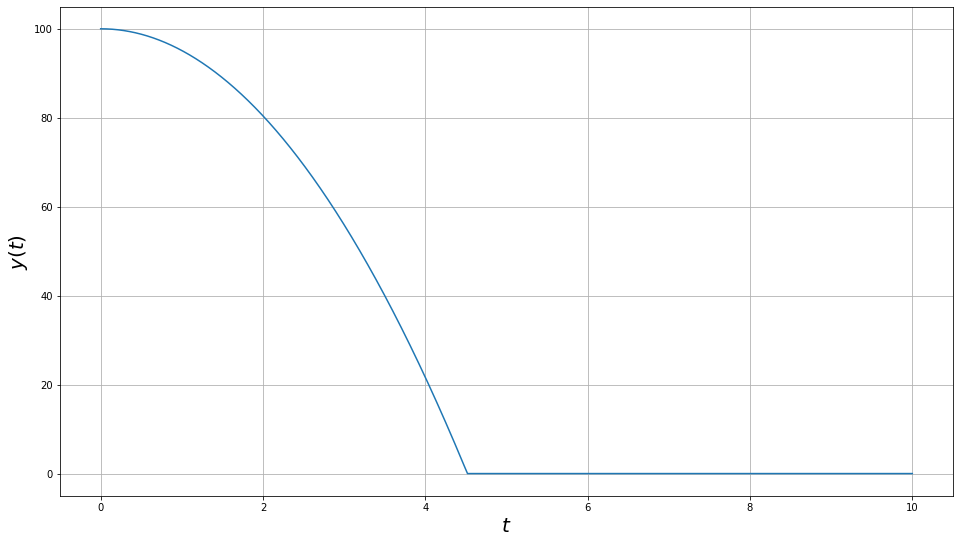

In [99]:
def f(t,x):
  return -9.8

t,y = verlet(f,100,0,0,10,0.001)
y[y<0] = 0
plt.figure(figsize=(16,9))
plt.plot(t,y)
plt.xlabel("$t$",fontsize=20)
plt.ylabel("$y(t)$",fontsize=20)
plt.grid('on')
plt.show()

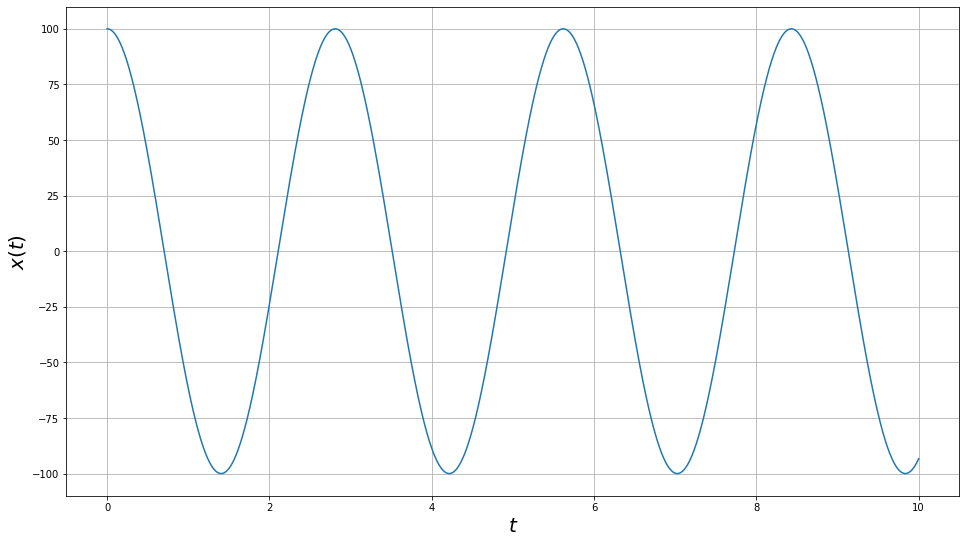

In [97]:
def f(t,x):
  return -5*x

t,y = verlet(f,100,0,0,10,0.001)

plt.figure(figsize=(16,9))
plt.plot(t,y)
plt.xlabel("$t$",fontsize=20)
plt.ylabel("$x(t)$",fontsize=20)
plt.grid()
plt.show()

In [98]:
def f(t,x):
  return -9.8

def f2(t,x):
  return -3

x0, y0 = 0,0

vx0 = 100
vy0 = 50
t,y = verlet(f,y0,vy0,0,15,0.0001)
t,x = verlet(f2,x0,vx0,0,15,0.0001)

y[y<0] = 0


@interact(t_ = (0,len(x)-1,1))
def interactive(t_=0):
  plt.figure(figsize=(16,9))
  plt.scatter(x[t_],y[t_],s=200)
  plt.plot(x[:t_],y[:t_],'red',linestyle='--')
  plt.axis([0,1200,0,200])
  plt.grid('on')
  plt.ylabel("$y(t)$",fontsize=20)
  plt.xlabel("$x(t)$",fontsize=20)
  plt.show()

interactive(children=(IntSlider(value=0, description='t_', max=150000), Output()), _dom_classes=('widget-inter…